In the following computations we classify matroidal subdivisions of $\Delta(3,8)$ using properties of their dual graphs. We study these subdivisions up to symmetry. This symmetry is induced by the action of the symmetric group $\mathfrak{S}_8$ on height functions $w\in\text{TGr}_0(3,8)\subset \mathbb{R}^{{[8]\choose 3}}$, where we think of $\mathfrak{S}_8$ as a subgroup of $\mathfrak{S}_{56}$.

That is, for $\sigma\in\mathfrak{S}_{8}$ and $\{i,j,k\}\in{[8]\choose 3}$, we take $\sigma\circ\{i,j,k\}=\{\sigma(i),\sigma(j),\sigma(k)\}$. In this way, we induce a permutation on the entries of $w$.

For each cone of $\text{TGr}_{0}(3,8)$, we have a representative from the interior. In other words, we have a representative for each symmetry class of matroidal subdivision.

In [ ]:
using Oscar
using Combinatorics
pm = Polymake

In [3]:
include("inputData38.jl");
include("fileHandling.jl")
include("tscCoordRing.jl");
include("matroidalSubd.jl");
include("Bmaximal.jl");
include("simplifyIdeal.jl");


In [4]:
function string2Int64Vector(s)
    return map(i -> parse(Int64, i), split(s))
end

function file2SetVectors(fileName)
    return map(s -> string2Int64Vector(s), readlines(fileName))
end

file2SetVectors (generic function with 1 method)

In [5]:
codim0 = file2SetVectors("cones/codim_0.dat")
codim1 = file2SetVectors("cones/codim_1-V2.dat")
codim2 = file2SetVectors("cones/codim_2.dat")
codim3 = file2SetVectors("cones/codim_3.dat")
codim4 = file2SetVectors("cones/codim_4.dat")
codim5 = file2SetVectors("cones/codim_5.dat")
codim6 = file2SetVectors("cones/codim_6.dat")
codim7 = file2SetVectors("cones/codim_7.dat")

12-element Vector{Vector{Int64}}:
 [8, 8, -6, -6, 8, 8, 8, -6, -6, 8  …  -6, 8, 8, 8, 8, -13, -6, -6, 8, 8]
 [8, 1, 8, 1, 1, 1, 8, -90, 8, 8  …  1, 1, 1, -6, -6, -6, 1, 1, 1, -6]
 [-3, -3, -3, -24, -24, -3, -3, -3, 11, 11  …  11, 11, -3, -10, 11, 11, -10, -24, -24, -10]
 [29, 1, -13, -13, 29, -13, 29, 15, 15, -48  …  -13, 29, -13, 29, -13, 29, 15, -27, 15, 15]
 [23, -33, -33, -33, 23, 23, -61, 44, 44, -5  …  -12, 44, 44, 44, 44, -5, -61, -61, -5, -5]
 [-1, -1, -1, -1, -8, -8, 6, 6, 6, -1  …  -22, 6, 6, 6, 6, -1, 6, 6, -1, -1]
 [13, 13, -36, -36, 13, -57, -22, 34, 34, -22  …  -50, -1, 34, -1, 34, -22, -50, -15, 34, 34]
 [24, -32, 24, -67, 38, 38, 24, -25, -11, -11  …  24, 24, 24, 38, 38, -67, -11, -11, -11, 3]
 [4, -3, -3, -3, 4, -3, 4, 4, 4, -10  …  -3, 4, -3, 4, -3, 4, 4, -3, 4, 4]
 [25, -45, -38, -38, 25, 11, 25, 32, 32, -10  …  -10, 53, 39, 53, 39, -3, -45, -59, 4, 4]
 [34, -43, -43, -43, 20, 20, 34, 34, 34, -8  …  -15, 48, 48, 48, 48, 6, -57, -57, 6, 6]
 [43, 15, -6, -20, 43, 15, -

In [6]:
all_cones = union(codim0,codim1,codim2,codim3,codim4,codim5,codim6,codim7)

57343-element Vector{Vector{Int64}}:
 [95, -164, -255, -255, 95, -164, 95, 354, 354, -332  …  -332, 354, -255, 354, -255, 95, -458, -332, 354, 354]
 [47, -79, -93, -198, 180, 173, 47, 33, 33, -359  …  -93, 180, 173, 180, 173, -254, -184, -191, -128, -128]
 [-104, -125, -251, -251, -104, -153, -104, 225, 225, -104  …  -314, 204, -230, 204, -230, -48, -258, -342, 176, 176]
 [31, -172, 31, -389, 290, 290, 24, -123, -88, -214  …  24, 248, 248, 283, 283, -354, -214, -214, -326, -291]
 [276, -354, -123, -305, 276, 115, 276, 87, 115, -354  …  -25, 346, 185, 374, 213, -256, -375, -186, 185, 213]
 [-105, -420, -455, -455, 91, 91, -273, 322, 322, 238  …  -420, 462, 462, 462, 462, -378, -259, -259, -238, -238]
 [23, -194, -89, -369, 310, 310, 16, -89, -54, -250  …  -54, 310, 310, 345, 345, -432, -320, -320, -292, -257]
 [-107, -23, 68, -86, 250, 243, -107, -247, -191, -240  …  -37, 89, 82, 145, 138, -86, -135, -142, -226, -170]
 [174, -190, -281, -379, 174, -22, 111, 230, 237, -281  …  -183, 265,

Let $w\in\text{TGr}_{0}(3,8)$. Then $w$ induces a matroidal subdivision of $\Delta(3,8)$, denoted $\mathcal{Q}(w)$. The tightspan, denoted $\text{TS}(w)$ is a polytopal complex whose faces are dual to $\mathcal{Q}(w)$. Each face of codimension $k$ face of $TS(w)$ corresponds to a $k$ dimensonal face of $\mathcal{Q}(w)$.

Let $\Gamma(w)$ be the graph dual to the subdivision induced by $w$. That is, $\Gamma(w)$ has a vertex $v$ for each maximal cell $C_v$ of $\mathcal{Q}(w)$, and an edge between $v$ and $v^{\prime}$ if $C_v$ and $C_{^{\prime}}$ intersect in codimension one. Observe that $\Gamma(w)$ is the 1-skeleton of $\text{TS}(w)$.


**Variable notation**

```cone``` = cone of $\text{TGr}_0(3,8)$ corresponding to representative $w$ from interior.

```subd``` = $\mathcal{Q}(w)$.

```Gra``` = $\Gamma(w)$.

```Tmc``` = $\text{TS}(w)$.

```Mp``` = maximal polytopes of $\text{TS}(w)$ as sets of vertices of $\text{TS}(w)$. Note that these are saved as a matrix such that the $ith$ row corresponds to $ith$ polytope. 

```Mc``` = maximal cells of $\mathcal{Q}(w)$ as sets of vertices of $\Delta(3,8)$. Saved as a matrix, as for ```Mp```

We compute the edge set of $\Gamma(w)$. (I"m not sure we need this cell here)

In [ ]:
#cone=coneRep2InteriorVector(S8,rays,MaxCones38[456])#representative of cone I am working with
#cone = all_cones[1021]
cone = all_cones[1]
subdcone = SubdivisionOfPoints(vDelta38[:,2:9], -cone)#subdivision corresponding to cone
Gra = subdcone.pm_subdivision.POLYHEDRAL_COMPLEX.DUAL_GRAPH
Tmc = subdcone.pm_subdivision.TIGHT_SPAN
Mp = Tmc.MAXIMAL_POLYTOPES
Mc = subdcone.pm_subdivision.MAXIMAL_CELLS
graphOscar = Graphs.Graph{Graphs.Undirected}(Gra.ADJACENCY)

 gdual = Graphs.Graph{Graphs.Undirected}(Gra.ADJACENCY)
    edges = collect(Graphs.edges(gdual))
    edges_set = Set{Set}()
    for i in 1:length(edges)
        Ei = edges[i]
        edge = Set([Ei.source, Ei.target])
        push!(edges_set,edge)
    end


**Function**:```common_vertex``` 

*Input*: ```Mc```

*Output*: ```Set```

*Description*: intersects vertex sets of maximal cells of $\mathcal{Q}(w)$, with the objective of finding a common basis of the matroids corresponding to these cells.

In [7]:
#checks for common basis
function common_vertex(Mc)
Int = pm.row(Mc,1)
for t in 1:size(Mc,1)
    Mt = pm.row(Mc,t)
    Int = intersect(Int,Mt)
end
    return Int
end

LoadError: UndefVarError: Mc not defined

**Function**: ```not_cell```

*Input*: ```Mp```, integer ```i``` corresponding to the $i$th maximal polytope

*Output* ```Set{Int}``` corresponding to the vertices of $\text{TS}(w)$ not contained in this cell.

*Description*: To be used in deleafing, definning procedures later.

In [8]:
#compute complement of ith cell
function not_cell(Mp,i)
    C = Set{Int64}()
    for j in 1:size(Mp,1)#loop through row indices of maximal polytopes
        if j != i
            Mj = pm.row(Mp,j)
            C = union(C,Mj)
        end
    
    end
    return C
end

not_cell (generic function with 1 method)

**Function**: is_tree

*Input*: ```Gra```, ```Tmc```

*Output*: ```Integer```

*Description*: Computes the number of faces in the tight span of a subdivision. That is, applplies Euelers formula. Will be used to determine if $\Gamma(w)$ is a tree

In [ ]:
#checks if graph is tree
function is_tree(Gra,Tmc)
    gdual = Graphs.Graph{Graphs.Undirected}(Gra.ADJACENCY)
    edges = collect(Graphs.edges(gdual))
    TmcVerts = Tmc.VERTICES
    Vsize = size(TmcVerts,1)
    Esize = length(edges)
    return Esize-Vsize+1
end

**Function** ```deleaf```

*Input*: ```Mp``` 

*Output*: ```Set```

*Description*: Removes leaves from $\Gamma(w)$ to obtain a subgraph. Intersects maximal polytopes ```Mc``` correspnding to vertices of deleafed subgraph. Returns vertices in intersection with objective of seeing if matroids have common bases. Note that in application, ```Mc``` is computed in earlier steps

In [10]:
function deleaf(Mp)

#eliminate leaves
not_leaves = Set{Int64}()
for t in 1:size(Mp,1)
    Mt = pm.row(Mp,t)
    if length(Mt) > 2
        push!(not_leaves, t)
    else
    int = intersect(Mt,not_cell(Mp,t))
        if length(int)>1
            push!(not_leaves,t)
        end
    end
end
#collect vertices in deleafed component
    max_cells = Set{Int64}()
        for i in not_leaves
            Mi = pm.row(Mp,i)
            max_cells = union(max_cells, Mi)
        end
        max_cells_vec = collect(max_cells)
    
#find common bases
        leaf_Int = pm.row(Mc,max_cells_vec[1])
        for t in max_cells_vec
            Mt = pm.row(Mc,t)
            leaf_Int = intersect(leaf_Int,Mt)
        end
return leaf_Int#newline testing may 21
end

deleaf (generic function with 1 method)

In [134]:
deleaf(Mp)

pm::Set<long, pm::operations::cmp>
{}

In [11]:
function branchDecomposition(graphOscar)
    
    g = Graphs.ne(graphOscar) - Graphs.nv(graphOscar) + 1
    
    if g==0
        return "tree"
    end
    
    BrVerts = leavesGraph(graphOscar)
    BrEdges = [(i, first(Graphs.all_neighbors(graphOscar, i))) for i in BrVerts]
    candidates = unique!([e[2] for e in BrEdges])
        
    stop = false
    i=0
    
    while !stop
        
        D = Dict([i => [j for j in Graphs.all_neighbors(graphOscar,i) if j ∉ BrVerts] for i in candidates])     
        #println("D = ", D)
        newCandidates = [i for i in keys(D) if length(D[i]) == 1]
        
        if length(newCandidates) == 0
            stop = true
        else
            unique!(append!(BrVerts, newCandidates))
            unique!(append!(BrEdges, [(i, first(D[i])) for i in newCandidates]))
            precandidates = unique!([e[2] for e in BrEdges])   
            candidates = [i for i in precandidates if i ∉ BrVerts]
        end
        #println("BrVerts = ", BrVerts)
        #println("BrEdges = ", BrEdges)
        #println("candidates = ", candidates)

        i+=1
    end
    
    
    Center = [i for i in 1:Graphs.nv(graphOscar) if i ∉ BrVerts ]
            
       
    return (BrVerts, BrEdges, Center)
    
end

function removeBranchCVP(w)
    subdwt = SubdivisionOfPoints(vDelta38[:,2:9], -w)
    Gr = subdwt.pm_subdivision.POLYHEDRAL_COMPLEX.DUAL_GRAPH
    GrO = Graphs.Graph{Graphs.Undirected}(Gr.ADJACENCY)
    Ms = subd2Matroids(subdwt,3,8)
    
    g = Graphs.ne(GrO) - Graphs.nv(GrO) + 1
    
    if g == 0
        return "dual graph is tree"
    end
    
    BrV, BrE, C = branchDecomposition(GrO)
    
    commonB = commonBasis([Ms[i] for i in C])
    
    return length(commonB) > 0    
    
end


removeBranchCVP (generic function with 1 method)

In [136]:
removeBranchCVP(cone)

false

**Function** ```get_edges```

*Input*: ```subd```

*Output* ```Set``` containing pairs of vertices corresponding to edges of $\Gamma(w)$. Note that at the time we performed these computations, Oscar did not yet have this as a build in functionality.

In [12]:
function get_edges(subd)
    Gra = subd.pm_subdivision.POLYHEDRAL_COMPLEX.DUAL_GRAPH
    
    gdual = Graphs.Graph{Graphs.Undirected}(Gra.ADJACENCY)
    edges = collect(Graphs.edges(gdual))
    edges_set = Set{Set}()
    for i in 1:length(edges)
        Ei = edges[i]
        edge = Set([Ei.source, Ei.target])
        push!(edges_set,edge)
    end
    return(edges_set)
end

get_edges (generic function with 1 method)

**Function**: ```find_fin```

*Input*: ```Mp```, ```Gra```, ```subd```

*Output*: ```Set``` of pairs $(F_i, e_i)$, where $F_i$ is a fin on $\Gamma(w)$, and $e_i$ are edges contained in $F_i$ and the rest of $\Gamma(w)$.

*Description*: Identifies faces of $\text{TS}(w)$ that are not leaves. Checks if the intersection of the such a face with the rest of the tightspan is contained in the set of edges. Returns pairs $(F_i, \{e_i\})$ where $the $e_i$ are the intersections of the fin with the rest of the tight span.

In [13]:

#find fins

function find_fin(Mp,Gra,subd)
    
    edges_set = get_edges(subd)
    
#eliminate leaves
    not_leaves = Set{Int64}()
    for t in 1:size(Mp,1)
        Mt = pm.row(Mp,t)
        if length(Mt)>2
            push!(not_leaves,t)
        else
        int = intersect(Mt,not_cell(Mp,t))
        if length(int)>1
            push!(not_leaves,t)
        end
        end
    end
#collect fins and connecting edge
    
    fins_n_edges = Vector()
    
    for i in not_leaves
        body = Set{Int64}()
        for t in not_leaves
            if t != i
                Mt = pm.row(Mp,t)
                body = union(body,Mt)
            end
        end
        
        Mi = pm.row(Mp,i)
        int = intersect(Mi,body)
        
        if int in edges_set
            push!(fins_n_edges,(collect(Mi),collect(int)))
        end
    end 
    
    return(fins_n_edges)
end


find_fin (generic function with 1 method)

**function** ```find_body```

*Input*: ```Mp```, ```Gra```, ```subd```

*Output*: ```Vector``` of vertices corresponding to maximal polytopes in $\text{TS}(w)$ that are not fins or leaves.

*Description*: Identifies fins and leaves, then collects vertices in definned/deleaged component of tight span in a vector. The output is in vector form so we can use random access on elements later.

In [14]:
#find body


function find_body(Mp,Gra,subd)
    

    
    finds = find_fin(Mp,Gra,subd)
   
    common_edges = Vector()
    
    if length(finds)>0
        
    for i in length(finds)
        
     push!(common_edges,finds[i][2])
        
    end
    
    end
    edges_set =get_edges(subd)
    
#eliminate leaves
    not_leaves = Set{Int64}()
    for t in 1:size(Mp,1)
        Mt = pm.row(Mp,t)
        int = intersect(Mt,not_cell(Mp,t))
        if length(int)>1
            push!(not_leaves,t)
        end
    end
#remove fins
    not_fins = Vector{Int64}()
    for i in not_leaves
        body = Set{Int64}()
        for t in not_leaves
            if t != i
                Mt = pm.row(Mp,t)
                union!(body,Mt)
            end
        end
        Mi = pm.row(Mp,i)
        int = intersect(Mi,body)
        if int in edges_set
        else
            push!(not_fins,i)
        end
    end 
    #collect vertices in definned component
    max_cells = Set()
        
        if length(common_edges)>0
            for edge in common_edges
                union!(max_cells,edge)
            end
        end
    
        for i in not_fins
            Mi = pm.row(Mp,i)
            max_cells = union(max_cells, Mi)
        end
        max_cells_vec = collect(max_cells)
        return max_cells_vec
end

find_body (generic function with 1 method)

**function**: ```fin_cvp```

*Input*: ```Mp```, ```Gra```, ```subd```, ```Mc```

*Output*: ```Set``` of common vertices of maximal cells of $\mathcal{Q}(w)$ corresponding to vertices of definned  deleafed tightspan.

*Description*: See if matroids corresponding to these cells share a common basis.



In [15]:
#deleaf, defin, cvp

function fin_cvp(Mp,Gra,subd,Mc)
    body = find_body(Mp,Gra,subd)
    fin_Int = pm.row(Mc,body[1])
    for i in body
        Mi = pm.row(Mc,i)
        fin_Int = intersect(fin_Int,Mi)
    end
    return fin_Int
end
    

fin_cvp (generic function with 1 method)

```all_cones``` = collection of all cones of $\text{TGr}_{0}(3,8)$ as representative height functions from interior.

In [22]:
all_cones = union(codim0,codim1,codim2,codim3,codim4,codim5,codim6,codim7)

57343-element Vector{Vector{Int64}}:
 [95, -164, -255, -255, 95, -164, 95, 354, 354, -332  …  -332, 354, -255, 354, -255, 95, -458, -332, 354, 354]
 [47, -79, -93, -198, 180, 173, 47, 33, 33, -359  …  -93, 180, 173, 180, 173, -254, -184, -191, -128, -128]
 [-104, -125, -251, -251, -104, -153, -104, 225, 225, -104  …  -314, 204, -230, 204, -230, -48, -258, -342, 176, 176]
 [31, -172, 31, -389, 290, 290, 24, -123, -88, -214  …  24, 248, 248, 283, 283, -354, -214, -214, -326, -291]
 [276, -354, -123, -305, 276, 115, 276, 87, 115, -354  …  -25, 346, 185, 374, 213, -256, -375, -186, 185, 213]
 [-105, -420, -455, -455, 91, 91, -273, 322, 322, 238  …  -420, 462, 462, 462, 462, -378, -259, -259, -238, -238]
 [23, -194, -89, -369, 310, 310, 16, -89, -54, -250  …  -54, 310, 310, 345, 345, -432, -320, -320, -292, -257]
 [-107, -23, 68, -86, 250, 243, -107, -247, -191, -240  …  -37, 89, 82, 145, 138, -86, -135, -142, -226, -170]
 [174, -190, -281, -379, 174, -22, 111, 230, 237, -281  …  -183, 265,

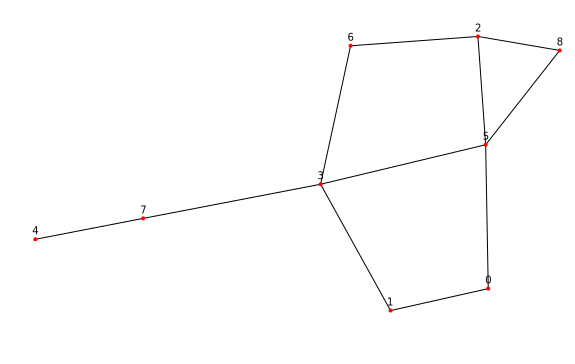

In [23]:

#cone=coneRep2InteriorVector(S8,rays,MaxCones38[456])#representative of cone I am working with
#cone = all_cones[1021]
cone = all_cones[42454]
subdcone = SubdivisionOfPoints(vDelta38[:,2:9], -cone)#subdivision corresponding to cone
Gra = subdcone.pm_subdivision.POLYHEDRAL_COMPLEX.DUAL_GRAPH
Tmc = subdcone.pm_subdivision.TIGHT_SPAN
Mp = Tmc.MAXIMAL_POLYTOPES
Mc = subdcone.pm_subdivision.MAXIMAL_CELLS
graphOscar = Graphs.Graph{Graphs.Undirected}(Gra.ADJACENCY)

 gdual = Graphs.Graph{Graphs.Undirected}(Gra.ADJACENCY)
    edges = collect(Graphs.edges(gdual))
    edges_set = Set{Set}()
    for i in 1:length(edges)
        Ei = edges[i]
        edge = Set([Ei.source, Ei.target])
        push!(edges_set,edge)
    end


pm.visual(Gra)#remember add +1 to vertices to compute bases etc.

 We now use the fucnctions defined above to sort matroidal subdivsions of $\Delta(3,8)$ into 6 combinatorial types.
 
 
 C1: Maximal cells of $\mathcal{Q}(w)$ share a common vertex.
 
 C2: $\Gamma(w)$ is a tree
 
 C3: The maximal cells of $\mathcal{Q}(w)$ corresponding to the deleafed tightspan share a common vertex.
 
 C4: The maximal cells of $\mathcal{Q}(w)$ corresponding to the debranched tightspan share a common vertex.
 
 C5: The maximal cells of $\mathcal{Q}(w)$ corresponding to the subcomplex of the tightspan obtained by deleafing and removing all fins that intersect in a single edge share a common vertex.
 
 C6: The maximal cells of $\mathcal{Q}(w)$ corresponding to suncomplex obtained by removing all leaves and fins is a tree.
 
 Note that these categories are not mutually exclusive. However if a height subdivision corresponding to $w$ is in $Cj$, then it is not in $Ci$ for $i<j$.
 
 Sorting these subdivisions up to symmetry in this way gives us a complete classification of all combinatorial types, for which we develop theory to prove properites about inverse limits.
  

In [24]:
#grand scheme

for i in 42454:length(all_cones)
    vDelta
    #cone=coneRep2InteriorVector(S8,rays,MaxCones38[i])#representative of cone I am working with
    
    cone = all_cones[i]
    subd = SubdivisionOfPoints(vDelta38[:,2:9], -cone)#subdivision corresponding to cone
    Gra = subd.pm_subdivision.POLYHEDRAL_COMPLEX.DUAL_GRAPH
    Tmc = subd.pm_subdivision.TIGHT_SPAN
    Mp = Tmc.MAXIMAL_POLYTOPES
    Mc = subd.pm_subdivision.MAXIMAL_CELLS
    graphOscar = Graphs.Graph{Graphs.Undirected}(Gra.ADJACENCY)

    gdual = Graphs.Graph{Graphs.Undirected}(Gra.ADJACENCY)
    edges = collect(Graphs.edges(gdual))
    edges_set = Set{Set}()
    for i in 1:length(edges)
        Ei = edges[i]
        edge = Set([Ei.source, Ei.target])
        push!(edges_set,edge)
    end

 if length(common_vertex(Mc))>0
       
        
        txtcvp = vec2String(cone)
        open("save_grand_scheme2/cvp4.dat", "a")do file
        write(file, txtcvp,"\n")
        end
        continue
        
 elseif is_tree(Gra,Tmc) == 0 #F = E -V + 1
       
        
        txttree = vec2String(cone)
        open("save_grand_scheme2/tree4.dat", "a")do file
        write(file, txttree,"\n")
        end
        continue

elseif length(deleaf(Mp))>0
        
        
        txtleaf = vec2String(cone)
        open("save_grand_scheme2/leaf_cvp4.dat", "a")do file
        write(file, txtleaf,"\n")
        end
        continue
    
elseif removeBranchCVP(cone)
        
        txtbranch = vec2String(cone)
        open("save_grand_scheme2/branch_cvp4.dat", "a")do file
        write(file, txtbranch,"\n")
        end
        print
        continue
    
elseif length(fin_cvp(Mp,Gra,subd,Mc))>0
    
        txtfin = vec2String(cone)
        open("save_grand_scheme2/fin_cvp4.dat", "a")do file
        write(file, txtfin,"\n")
            end
        continue
else
        
        
        txtother = vec2String(cone)
        open("save_grand_scheme2/other4.dat", "a")do file
        write(file, txtother,"\n")
        end
        continue
    end

end

print("DONE :)")

DONE :)

In [27]:
cvp = file2SetVectors("save_grand_scheme2/cvp.dat")
tree = file2SetVectors("save_grand_scheme2/tree.dat")
leaf = file2SetVectors("save_grand_scheme2/leaf_cvp.dat")
branch = file2SetVectors("save_grand_scheme2/branch_cvp.dat")
fin = file2SetVectors("save_grand_scheme2/fin_cvp.dat")
other = file2SetVectors("save_grand_scheme2/other.dat")

cvp2 = file2SetVectors("save_grand_scheme2/cvp2.dat")
tree2 = file2SetVectors("save_grand_scheme2/tree2.dat")
leaf2 = file2SetVectors("save_grand_scheme2/leaf_cvp2.dat")
branch2 = file2SetVectors("save_grand_scheme2/branch_cvp2.dat")
fin2 = file2SetVectors("save_grand_scheme2/fin_cvp2.dat")
other2 = file2SetVectors("save_grand_scheme2/other2.dat")

cvp3 = file2SetVectors("save_grand_scheme2/cvp3.dat")
tree3 = file2SetVectors("save_grand_scheme2/tree3.dat")
leaf3 = file2SetVectors("save_grand_scheme2/leaf_cvp3.dat")
branch3 = file2SetVectors("save_grand_scheme2/branch_cvp3.dat")
fin3 = file2SetVectors("save_grand_scheme2/fin_cvp3.dat")
other3 = file2SetVectors("save_grand_scheme2/other3.dat")

cvp4 = file2SetVectors("save_grand_scheme2/cvp4.dat")
tree4 = file2SetVectors("save_grand_scheme2/tree4.dat")
leaf4 = file2SetVectors("save_grand_scheme2/leaf_cvp4.dat")
branch4 = file2SetVectors("save_grand_scheme2/branch_cvp4.dat")
fin4 = file2SetVectors("save_grand_scheme2/fin_cvp4.dat")
other4 = file2SetVectors("save_grand_scheme2/other4.dat")

48-element Vector{Vector{Int64}}:
 [52, -67, 38, 38, 52, -18, 45, 45, 45, -46  …  -39, 80, 31, 80, 31, 45, -130, -74, 45, 45]
 [45, -18, 45, 45, 38, -60, 45, 87, 87, -25  …  -60, 38, 45, 38, 45, 38, -25, -123, 80, 80]
 [-64, -120, 34, 34, 48, 48, -120, 34, 34, 48  …  -78, 41, 41, 41, 41, -50, -71, -71, -162, -162]
 [-5, -13, 9, 9, 3, 3, -5, -16, -16, -7  …  -10, 2, 2, 2, 2, -7, -12, -12, -3, -3]
 [-144, -39, 38, 38, 80, 73, -144, -67, -67, -25  …  -11, 52, 45, 52, 45, -18, -207, -109, -46, -46]
 [-22, -92, 34, 34, 62, 55, -22, -22, -22, -204  …  -36, 13, 6, 13, 6, -71, -8, -15, -71, -71]
 [0, -3, 0, 0, 6, 5, 0, 0, 0, -24  …  -6, 3, 2, 3, 2, -7, 0, -1, -7, -7]
 [-52, -94, 25, 25, 46, 46, -52, -59, -59, -38  …  -17, 25, 25, 25, 25, -59, -108, -108, -66, -66]
 [65, -89, 23, 23, 65, -26, 65, 51, 51, -47  …  -54, 9, 23, 9, 23, 65, -26, -12, 51, 51]
 [-66, -10, 11, 11, 60, 60, -66, -66, -66, -52  …  -38, 32, 32, 32, 32, -24, -94, -94, -24, -24]
 [-10, -59, 46, 46, 39, 39, -10, -115, -115, -1

In [17]:
count = union(cvp,tree,leaf,branch,fin,other,cvp2,tree2,leaf2,branch2,fin2,other2,
    cvp3,tree3,leaf3,branch3,fin3,other3)

42453-element Vector{Vector{Int64}}:
 [-105, -420, -455, -455, 91, 91, -273, 322, 322, 238  …  -420, 462, 462, 462, 462, -378, -259, -259, -238, -238]
 [174, -190, -281, -379, 174, -22, 111, 230, 237, -281  …  -183, 265, 69, 272, 76, -106, -379, -225, 223, 230]
 [68, -93, -261, -184, 68, 33, -44, 138, 110, -44  …  -107, 110, 75, 82, 47, 19, 54, 19, -149, -37]
 [458, -74, 178, -354, 458, 220, -529, 563, 31, -438  …  -39, 458, -410, -74, 3, 500, 493, -375, -123, 535]
 [-54, -110, -19, -19, 30, 23, -19, 72, 72, -124  …  -89, 121, 114, 121, 114, -117, -334, -236, -26, -26]
 [-168, -42, -168, -168, 42, 35, -28, -49, -49, 56  …  -119, 112, 105, 112, 105, -245, -350, -252, -21, -21]
 [39, -115, -213, -311, 81, 39, 4, 116, 123, -10  …  -94, 193, 151, 200, 158, -115, -248, -255, 32, 39]
 [-148, -85, 62, 55, -29, -29, -218, -386, -288, 48  …  -232, 104, 104, 97, 97, -323, -316, -316, -316, -323]
 [289, -460, -110, -320, 289, 58, 261, 156, 191, -411  …  -26, 338, 107, 373, 142, -124, -397, -173, 

In [18]:
length(count)

42453